In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [59]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [60]:
# Display basic information about the dataset
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Number of samples: 569
Number of features: 30


In [61]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Implementing Logistic regression algorithm

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # Compute gradients
            dz = predictions - y
            dw = (1 / m) * np.dot(X.T, dz)
            db = np.sum(dz)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

In [65]:

# Train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)


In [66]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[41  2]
 [ 0 71]]
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112


AUC-ROC: 0.998689813298395


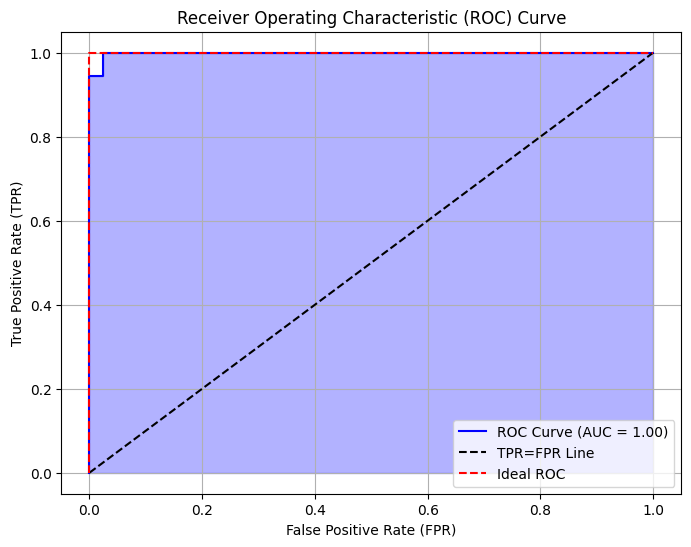

In [67]:
# Calculate the probabilities for the positive class
y_probs = model.predict_proba(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", auc_roc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_roc), color='b')
plt.plot([0, 1], [0, 1], linestyle='--', label="TPR=FPR Line", color='k')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label="Ideal ROC", color='r')
plt.fill_between(fpr, tpr, 0, color='b', alpha=0.3)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

AUC-PR Score : 0.9991949244989848
Average Precision Score : 0.9992006779740839


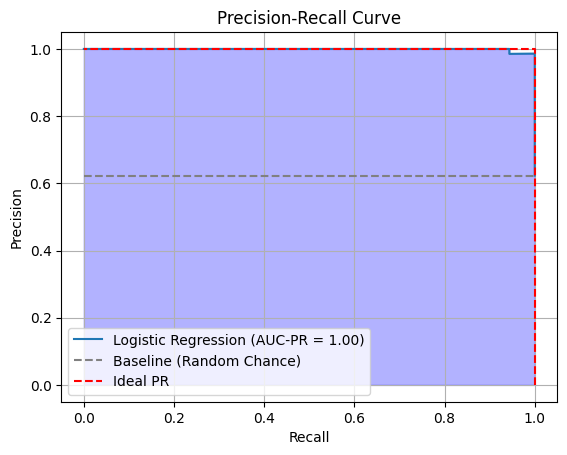

In [77]:
from sklearn.metrics import precision_recall_curve, auc

# Compute the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute the Area Under the PR curve
auc_pr = float(auc(recall, precision))
print("AUC-PR Score :",auc_pr)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_probs)
print("Average Precision Score :", avg_precision)


# Compute the baseline for the model (random chance)
baseline = len(y_test[y_test == 1]) / len(y_test)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label=f'Logistic Regression (AUC-PR = {auc_pr:.2f})')

# Plot the baseline
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline (Random Chance)', color='gray')

#Plot the Idel PR Curve
plt.plot([1, 1, 0], [0, 1, 1], linestyle='--', label="Ideal PR", color='r')

plt.fill_between(recall, precision, 0, color='b', alpha=0.3)

# Set plot attributes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()





